,Time (s),Channel 1 (V),Channel 2 (V),Math 1 (A)
0,-1.00025,-4.549462,-0.009911,-0.000010
1,-1.00000,-4.545812,-0.009911,-0.000010
2,-0.99975,-4.545812,-0.009911,-0.000010
3,-0.99950,-4.542161,-0.009911,-0.000010
4,-0.99925,-4.538510,-0.009911,-0.000010
...,...,...,...,...
7106,0.77625,2.544395,0.664834,0.000669
7107,0.77650,2.544395,0.664834,0.000669
7108,0.77675,2.544395,0.668501,0.000673
7109,0.77700,2.548046,0.672168,0.000677


TypeError: cannot do positional indexing on RangeIndex with these indexers [      Channel 1 (V)
0         -4.549462
1         -4.545812
2         -4.545812
3         -4.542161
4         -4.538510
...             ...
7106       2.544395
7107       2.544395
7108       2.544395
7109       2.548046
7110       2.548046

[7111 rows x 1 columns]] of type DataFrame

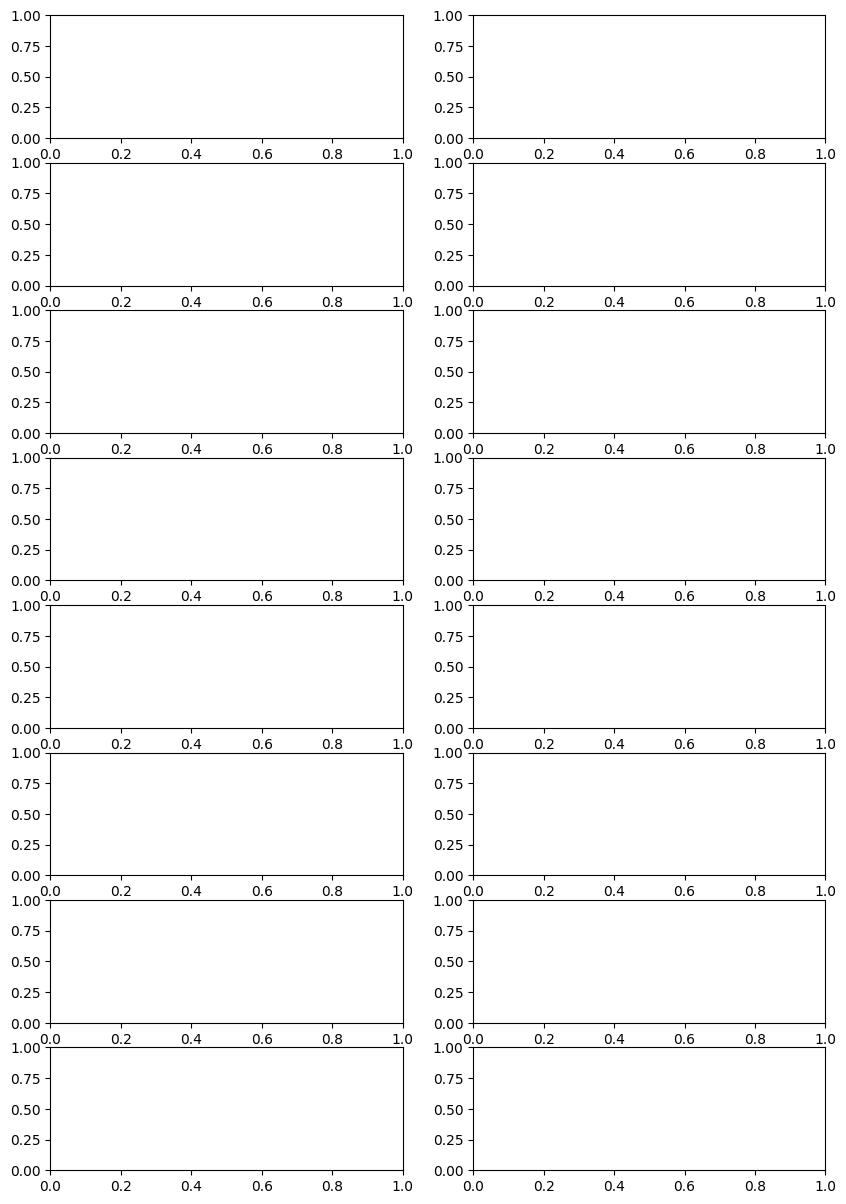

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

files = ['blue led.csv', 'red led.csv', 'green led.csv', 'yellow led.csv', 'white led.csv', 'rectifier diode.csv', 'z diode.csv', 'signal diode.csv']
data = []
for i in range(len(files)):
    data.append(pd.read_csv(files[i], skiprows=21, encoding='cp1252'))
fig, axes = plt.subplots(8,2)
fig.set_figheight(15)
fig.set_figwidth(10)

for i in range(len(data)):
    display(data[i])
    data[i] = data[i].iloc[data[i][["Channel 1 (V)"]]:-1]
    axes[i, 0].plot(data[i]["Time (s)"], data[i]["Channel 1 (V)"])
    axes[i, 1].plot(data[i]["Channel 1 (V)"], data[i]["Math 1 (A)"])